<a href="https://colab.research.google.com/github/DataMascara/food_detection/blob/main/TestingModel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
# picking 3 food items and generating separate data folders for the same
food_list = ['samosa','pizza','omelette']
src_train = 'food-101/train'
dest_train = 'food-101/train_mini'
src_test = 'food-101/test'
dest_test = 'food-101/test_mini'

In [5]:
from keras.models import load_model
model = load_model('/best_model_3class.hdf5')

In [7]:
# Loading the best model to make predictions
%%time
import tensorflow.keras.backend as K
from tensorflow.keras.models import load_model

K.clear_session()
model_best = load_model('/best_model_3class.hdf5',compile = False)

CPU times: user 2.68 s, sys: 79.4 ms, total: 2.76 s
Wall time: 2.6 s


In [8]:
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import numpy as np
import os

def predict_class(model, images, show = True):
  for img in images:
    img = image.load_img(img, target_size=(299, 299))
    img = image.img_to_array(img)                    
    img = np.expand_dims(img, axis=0)         
    img /= 255.                                      

    pred = model.predict(img)
    index = np.argmax(pred)
    food_list.sort()
    pred_value = food_list[index]
    if show:
        plt.imshow(img[0])                           
        plt.axis('off')
        plt.title(pred_value)
        plt.show()

In [9]:
# Downloading or uploading images from internet or you local computer


from google.colab import files
uploaded = files.upload()

Saving omlete.png to omlete.png
Saving samosa.jpg to samosa.jpg
Saving pizza.jpg to pizza.jpg


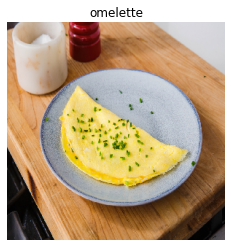

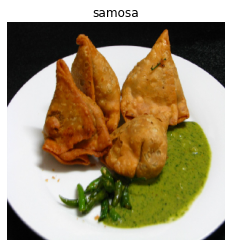

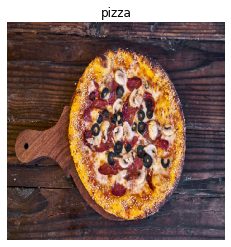

In [13]:
# Make a list of downloaded images and test the trained model
images = []
images.append('omlete.png')
images.append('samosa.jpg')
images.append('pizza.jpg')

predict_class(model_best, images, True)